In [82]:
from __future__ import division
import numpy as np
import glob
import pylab as plt
from astropy.io import fits
import astropy
import barycorrpy

Working on the coordinate array to make pointing more automatic.
I was thinking maybe we can for loop this into the pointing somehow.

Like in the data acquisition section for-looping through the coordinates and maybe using the coordinates in the filename to easily distinguish them as well.

In [74]:
def get_projected_velocity(ra, dec, jd, obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.):
    '''Compute the projected velocity of the telescope wrt the 
    Local Standard of Rest.
    Parameters
    ----------
    ra, dec : float degrees, the RA/DEC of target
    jd      : float, julian date (UTC) of the observation
    obs_lat : float degrees, latitude of observatory, default=nch.lat
    obs_lon : float degrees, longitude of observatory, default=nch.lon
    obs_alt : float meters, altitude of observatory, default=nch.alt
    epoch   : float, julian date epoch of ra/dec coordinates
              default=2451545 is J2000
    Returns
    -------
    v : float m/s, barycenter-corrected radial velocity,
        see (Wright & Eastman, 2014) '''
    jd_utc = astropy.time.Time(jd, format='jd', scale='utc')
    proper_motion_ra = 0. # proper motion in ra, mas/yr
    proper_motion_dec = 0. # proper motion in dec, mas/yr
    parallax = 0. # parallax of target in mas
    rv = 0. # radial velocity of target in m/s
    zmeas = 0. # measured redshift of spectrum
    ephemeris = 'de430' # ephemeris from jplephem, ~100MB download first use
    v, warn, flag = barycorrpy.get_BC_vel(JDUTC=jd_utc, ra=ra, dec=dec, 
        lat=obs_lat, longi=obs_lon, alt=obs_alt,
        pmra=proper_motion_ra, pmdec=proper_motion_dec,
        px=parallax, rv=rv, zmeas=zmeas,
        epoch=epoch, ephemeris=ephemeris, leap_update=False)
    return v

In [2]:
l = np.linspace(60, 110, 26)
b = np.linspace(-90, -30, 31)

In [3]:
#list that will hold the coordinates for the observation
coords = []
#counter to make sure that every other value needs to be reversed. Used in the forloop below
N = 1

#for loop that loops through the coordinates and assigns them to the coords list
for i in range(len(l)):
    
    for j in range(len(b)):
        
        #this if statement hecks to see if the N value is divisible by 2 we do this to
        #flip the order of the vertical component of the observation 
        if N % 2 == 0:
            
            coords.append(np.array([l[i], b[-1 * (j+1)]]))
        
        else:
            coords.append(np.array([l[i], b[j]]))
    
    #increments the counter        
    N += 1    

In [222]:
#me checking to see if the for loop did its job i should expect to see
#    [60, -30]
#    [62, -30]
# 
#    [62, -90]
#    [64, -90]
#
#Which I see and that is very awesome :D!!!
#FIERRROOOO!!!!!!!!!!!

#MUST EMPHASIZE THIS USES GALACTIC COORDINATES BUT SHOULD BE EASY TO TRANSLATE INTO (RA,DEC)

#for i in coords:
#    print(i)

This is gonna be where I work on the 2D data for when we have the Magellenic data.

This is gonna be the matrix that has b-rows and l-columns.

b by l

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

In [5]:
plt.rc('font', **font)

In [6]:
ll, bb = np.meshgrid(l,b)

In [7]:
print('row: ', len(bb[:,0]))
print('column: ', len(bb[0,:]))

row:  31
column:  26


MAKING AN EMPTY MATRIX WITH THE SAME ROW AND COLUMNS AS ABOVE

THIS WILL HOLD THE INFORMATION FOR THE DATA GATHERED FROM OUR OBSERVATIONS

In [8]:
matrix = np.zeros((31,26))

In [9]:
#MAKING TWO LISTS ONE THAT HOLDS THE GALACTIC COORDINATES LABELED AS:
#lb_val
#AND ANOTHER ONE CALLED INDEXES WHICH IS WHERE THE INDEX ARE IN THE MESHGRID ARRAY

lb_val = []
indexes = []

for i in range(len(ll[:,0])):
    for j in range(len(bb[0,:])):
        
        #HOLDING THE ROW INDEX
        row = i
        #HOLDS THE COLUMN INDEX
        column = j
        
        #HOLDS THE INDEX IN A LIST
        index = [i,j]
        
        #APPENDING THE VALUE FOR LL AND BB INTO THE [L,B] GALACTIC COORDINATES
        lb_val.append([ll[i,j], bb[i,j]])
        indexes.append(index)

In [221]:
#for i in range(len(lb_val)):
 #   print(lb_val[i], indexes[i])

Text(0, 0.5, 'Galactic Latitude (b)')

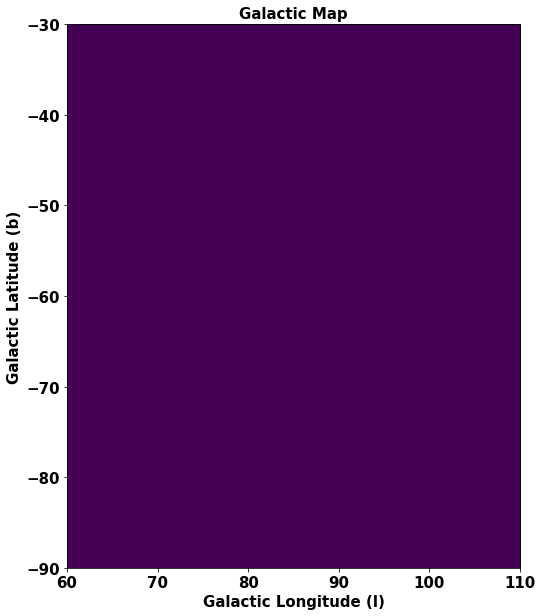

In [72]:
plt.figure(figsize = (10,10))
plt.title('Galactic Map', fontsize = 15, weight = 'semibold')
plt.imshow(matrix, origin = 'lower', extent=[60,110,-90,-30])
plt.xlabel('Galactic Longitude (l)', fontsize = 15, weight = 'semibold')
plt.ylabel('Galactic Latitude (b)', fontsize = 15, weight = 'semibold')

Making functions that automates the data collection and places them into the respective latitude and longitude on the imshow plot

For us our data will be in the form of jddd.ddd.l.b.fits

What we are interested in is extracting the l and b from the fits name so that we can correctly place them in the plots

In [197]:
def frequency(hdu, data):
    '''
    Function that generates a frequency array the length of data
    
    Parameter
    ---------
    
    data: the data we are trying to get the frquency array for
    
    Output
    ---------
    freq: frequency array with the given sampling frequency of 96 MHz
    '''
    nu_samp = hdu[0].header['SAMPRATE']
    
    freq = np.fft.fftfreq(len(data), d = 1/nu_samp)
    
    return freq/1e6 +150

In [74]:
#The code below extracts all the fits files from the directory into the variable name files

In [224]:
files = np.sort(np.array([f for f in glob.glob("*.fits")]))

In [226]:
print(files)

['2458597.01482.60.0.-30.0.fits' '2458597.01482.60.0.-32.0.fits'
 '2458597.01482.60.0.-34.0.fits' '2458597.01482.60.0.-36.0.fits'
 '2458597.01482.60.0.-38.0.fits' '2458597.01482.60.0.-40.0.fits'
 '2458597.01482.60.0.-42.0.fits' '2458597.01482.60.0.-44.0.fits'
 '2458597.01482.60.0.-46.0.fits' '2458597.01482.60.0.-48.0.fits'
 '2458597.01482.60.0.-50.0.fits' '2458597.01482.60.0.-52.0.fits'
 'noise_off.fits' 'noise_on.fits']


In [227]:
cal_files = ['noise_off.fits', 'noise_on.fits']

In [228]:
noise_file_filter = np.ones(len(files), dtype = bool)

for i in range(len(files)):
    
    if cal_files[0] == files[i]:
        noise_file_filter[i] = False
    if cal_files[1] == files[i]:
        noise_file_filter[i] = False

spec_files = files[noise_file_filter]

In [229]:
print(spec_files)

['2458597.01482.60.0.-30.0.fits' '2458597.01482.60.0.-32.0.fits'
 '2458597.01482.60.0.-34.0.fits' '2458597.01482.60.0.-36.0.fits'
 '2458597.01482.60.0.-38.0.fits' '2458597.01482.60.0.-40.0.fits'
 '2458597.01482.60.0.-42.0.fits' '2458597.01482.60.0.-44.0.fits'
 '2458597.01482.60.0.-46.0.fits' '2458597.01482.60.0.-48.0.fits'
 '2458597.01482.60.0.-50.0.fits' '2458597.01482.60.0.-52.0.fits']


In [31]:
hd = fits.open(files[0])
hdr = hd[0].header

In [206]:
#print(repr(hdr))

In [284]:
def Gain(s_cal, s_cold):
    
    '''
    Function that calculates the gain for the telescope
    
    Parameters
    ------------
    s_cal: calibrated data, this should be the one with the noise added
    s_cold: non-calibrated data just the telescope pointing in an arbitrary direction
    
    Ouptut
    ------------
    G: the gain calculated for the telescope which we multiply all our power spectrum by
    '''

    #the temperature we used for the calibration we we use as 30K for the T_cal and T_cold as space 2.73K       
    T_cal = 30
    T_cold = 2.73

    #getting the difference
    diff = s_cal-s_cold

    #calculating the Gain
    G = ((T_cal - T_cold)/(np.sum(diff))) * np.sum(s_cold)
    
    return G

In [17]:
def Num_Spec(hdu):
    
    '''
    Function that returns the number of spectrums we have in our FITS file
    
    Parameter
    ----------
    hdu: the hdu for the data we want to get
    
    Output
    ----------
    The number of samples we used 
    '''
    
    N = hdu[0].header['NSPEC']
    
    return N

In [223]:
def T_power(line, G):
    
    '''
    Function that calculates the intensity of the power spectrum given the spectrum and gain value
    
    Parameter
    -----------
    line: the spectrum we will multiply by the gain
    G: the gain of the telescope
    
    Output
    -----------
    power: the final calibrated intesnity of the object in units of temperature
    '''
    #getting the final intensity power
    power = line * G

    return power

In [33]:
def fit(data, freq):
    
    '''
    Function to fit the data we collected form the telescope and fit a quadratic to the data
    
    We use scipy's curve_fit to optimize the parameters for the quadratic
    
    Parameter
    -----------
    
    data: This is the power spectrum data
    freq: the frequency array for the data
    
    Output
    -----------
    outputs the best fit line as an array 
    
    '''
    
    #making a model for which we are trying to optimize in this case this is a quadratic equation
    def model(x, a, b, c):
        return a*x**2 + b*x + c
    
    #using curve_fit to get the optimized values for a, b, c in the quadratic equation
    param, covar = curve_fit(model, np.fft.fftshift(freq), data)
    
    return model(np.fft.fftshift(freq), param[0], param[1], param[2])    

In [275]:
def data(hdu):
    
    '''
    Function that calculates the average power spectrum from the N samples that we took
    We do this to reduce the noise in the power spectrum
    
    Parameters
    ----------
    
    hdu: the hdu for the data we are tyring to find the average power spectrum for
    N: the number of integrated samples we took
    
    Output
    ----------
    
    avg: this is the averaged power spectrum over the N samples
    '''
    
    N = hdu[0].header['NSPEC']
    nu_samp = int(hdu[0].header['SAMPRATE'])
    
    #this is a counter variable for the while loop
    M = 1
    
    #variable that will hold the averaged power spectrum for one polarization and another
    data = 0
    data_pol = 0
    
    #while loop that does the summation
    while M <= N:
        
        data += hdu[M].data['auto0_real']
        data_pol += hdu[M].data['auto1_real']
        M+=1
    
    #calculates the average of each power spectrum
    avg = data/N
    avg_pol = data_pol/N
    
    sum_avg = (avg+avg_pol)/2
    
    #freq = np.fft.fftfreq(sum_avg, d = 1 / nu_samp)
    
    #making a model for which we are trying to optimize in this case this is a quadratic equation
    #def model(x, a, b, c):
     #   return a*x**2 + b*x + c
    
    #using curve_fit to get the optimized values for a, b, c in the quadratic equation
    #param, covar = curve_fit(model, np.fft.fftshift(freq), data)
    
    med_spec = medfilt(avg, kernel_size = 5)
    med_pol_spec = medfilt(avg_pol, kernel_size = 5)
    spec = medfilt(sum_avg, kernel_size = 5)
    
    return spec

---

Working on Noise/Calibration data

---

In [230]:
hdu1 = fits.open(cal_files[0])#Noise Off Data
hdu2 = fits.open(cal_files[1]) #Noise On Data

In [262]:
cal = hdu1[3].data['auto1_real']

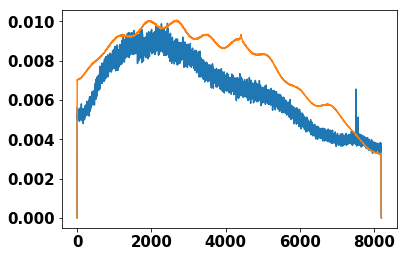

In [263]:
plt.plot(cal)

plt.plot(cal_spec)

In [276]:
cold_spec = data(hdu1)
cal_spec = data(hdu2)

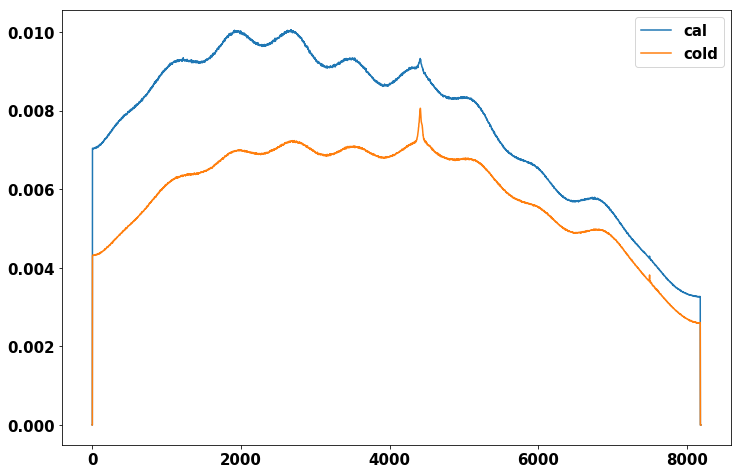

In [282]:
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(111)
ax1.plot(cal_spec, label = 'cal')
ax1.plot(cold_spec, label = 'cold')
ax1.legend()

#ax2 = fig.add_subplot(212)
#ax2.plot(cold_spec, label = 'cold')
#ax2.plot(cold_spec_pol, label = 'cold-pol')
#ax2.legend()

In [286]:
G = Gain(cal_spec, cold_spec)
print(G)

86.78662567660604


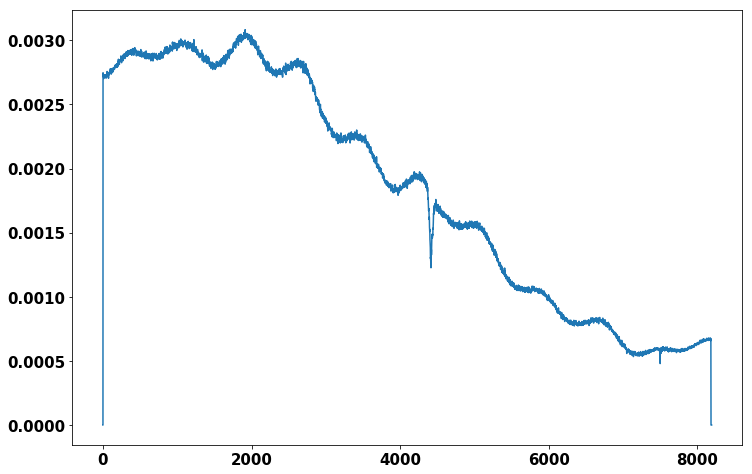

In [45]:
from scipy.optimize import curve_fit

In [154]:
from scipy.signal import medfilt

In [156]:
from scipy.interpolate import interp1d

In [299]:
def average_spectrum(i):
    
    '''
    Function that calculates the average power spectrum from the N samples that we took
    We do this to reduce the noise in the power spectrum
    
    Parameters
    ----------
    
    hdu: the hdu for the data we are tyring to find the average power spectrum for
    N: the number of integrated samples we took
    
    Output
    ----------
    
    avg: this is the averaged power spectrum over the N samples
    '''
    
    filename = spec_files[i]
    hdu = fits.open(filename)
    
    l = hdu[0].header['L']
    b = hdu[0].header['B']
    RA = hdu[0].header['RA']
    DEC = hdu[0].header['DEC']
    JD = hdu[0].header['JD']
    
    N = Num_Spec(hdu)  
    
    #this is a counter variable for the while loop
    M = 1
    
    #variable that will hold the averaged power spectrum for one polarization and another
    data = 0
    data_pol = 0
    
    #while loop that does the summation
    while M <= N:
        
        data += hdu[M].data['auto0_real']
        data_pol += hdu[M].data['auto1_real']
        M+=1
           
    
    #calculates the average of each power spectrum
    avg = data/N
    avg_pol = data_pol/N
    
    #averaging the spectrum 
    sum_avg = (avg + avg_pol)/2
    
    spec = medfilt(sum_avg, kernel_size =5) * G
    
    freq = frequency(hdu, spec)
    
    max_i = np.argmax(spec)
    
    filt = np.ones(len(spec), dtype = bool)
    
    for i in range(len(spec)):
        if i >= max_i - 500 and i <= max_i + 500:
            filt[i] = False
            
    f = interp1d(np.fft.fftshift(freq)[filt], spec[filt], kind = 'linear')
    
    ynew = f(np.fft.fftshift(freq))
    
    new_spec = spec - ynew
    
    
    freq_vel = freq.copy() * 1e6 + 1270e6 # add on the LO that reduces our signal
    #print(freq_vel)
    nu = 1420.405751786e6 #MHz
    delta_nu = freq_vel - nu
    c = 3 * (10**8)
    v = -(delta_nu / nu) * c

    doppler_v = get_projected_velocity(RA, DEC, JD) 
    
    
    
    '''
    plt.figure(figsize = (12,8))
    plt.title('Galactic Coordinate: ' + str(round(l, 3)) +',' + str(round(b,3)), fontsize = 15, weight = 'semibold')
    plt.xlabel(r'Frequency $\nu$', fontsize = 15, weight = 'semibold')
    plt.ylabel(r'Power Spectrum', fontsize = 15, weight = 'semibold')
    plt.plot(np.fft.fftshift(freq), new_spec, label = 'Signal')
    plt.xlim(145,155)
    plt.axvline(150.4057518, linestyle='--')
    #plt.plot(np.fft.fftshift(freq), ynew, label = 'Interp')
    plt.legend()
    '''
    
    max_index = np.argmax(new_spec)
    
    fig = plt.figure(figsize = (12, 8))
    plt.plot(np.fft.fftshift(v)/1000, new_spec, label = 'Rest Velocity', color='orange')
    plt.plot(np.fft.fftshift(v - doppler_v)/1000, new_spec, label = 'Doppler Velocity', color='b')
    plt.legend(loc='best')
    
    
    plt.xlim(-400,400)
    plt.axvline(np.fft.fftshift(v)[max_index]/1000)
    plt.axvline(np.fft.fftshift(v - doppler_v)[max_index]/1000)
    plt.xlabel('Velocity (km/s)', fontsize=12)
    plt.ylabel('Power', fontsize=12)
    plt.title('Doppler', fontweight='bold', fontsize=15)
    print('Rest Velocity: ', np.fft.fftshift(v)[max_index]/1000)
    print('Doppler Velocity: ', np.fft.fftshift(v - doppler_v)[max_index]/1000)

In [187]:
from ipywidgets import interactive

In [300]:
interactive_plot = interactive(average_spectrum, i = (0, len(spec_files)-1))
interactive_plot

interactive(children=(IntSlider(value=5, description='i', max=11), Output()), _dom_classes=('widget-interact',…

In [218]:
def splitting_filename(filename):
    
    #loops through the filenames of the data that we gathered
    for i in filename:
        hdu = fits.open(i)
        f_split = i.split('.')
        
        #getting only the l and b because that is all that we need
        l = f_split[2]
        b = f_split[3]
        
        N = 0
        for m in range(len(lb_val)):
            
            if l == str(lb_val[m][0]) and b == str(lb_val[m][1]):
                row_index = indexes[m][0]
                column_index = indexes[m][1]
                
                average_spectrum(hdu)
                
                matrix[row_index, column_index] = #DATA THAT NEEEDS TO BE APPENDED TO THE SPECIFIED LOCATION
                N+=1
        
    print(matrix)    

SyntaxError: invalid syntax (<ipython-input-218-70de19b858b2>, line 21)

In [217]:
splitting_filename(files)

NameError: name 'splitting_filename' is not defined